### Introduction:
    This is an advertising dataset.In this dataset there are some platform like TV,Radio,Newspaper and sales.Here i build a model which predicts sales based on the money spent on different platforms for marketing.

In [1]:
# importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
sales=pd.read_csv("advertising.csv")

In [3]:
# see first five rows
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# show last 5 rows
sales.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
# shape of the dataset
sales.shape

(200, 4)

In this dataset have 200 observations and 4 columns

In [6]:
# statistical summary
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
sales.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
sales.duplicated().sum()

0

There is no duplicate values

In [10]:
# check missing values
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

this dataset have no missing values

# Outliers

<Axes: xlabel='TV'>

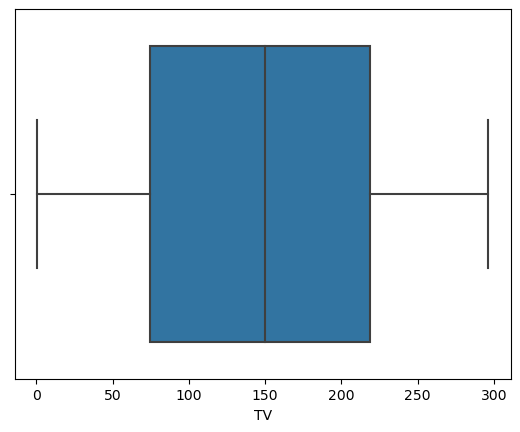

In [11]:
sns.boxplot(x=sales['TV'])

<Axes: xlabel='Radio'>

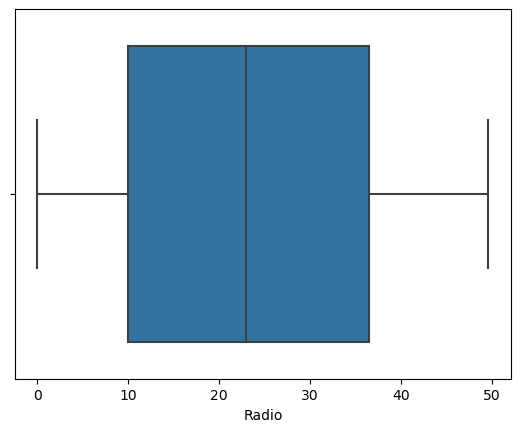

In [12]:
sns.boxplot(x=sales['Radio'])

<Axes: xlabel='Newspaper'>

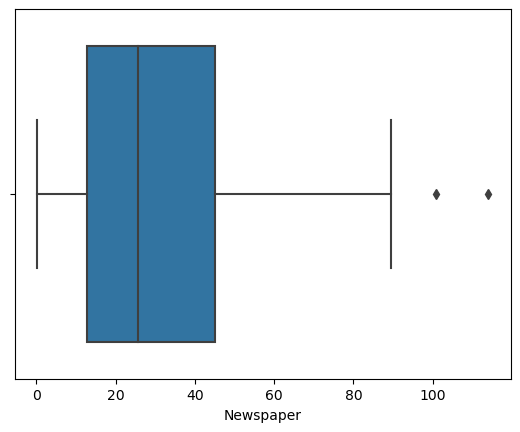

In [13]:
sns.boxplot(x=sales['Newspaper'])

# EDA

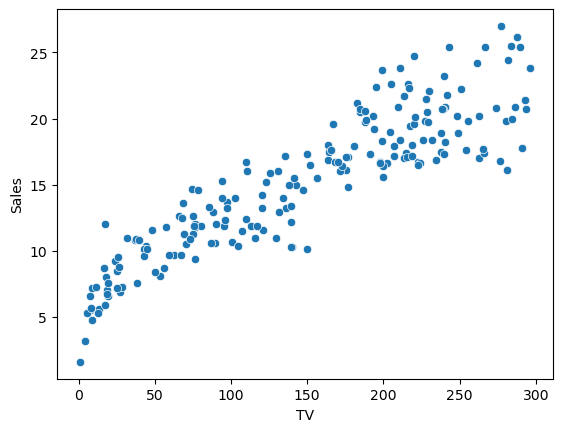

In [34]:
sns.scatterplot(y='Sales',x='TV',data=sales)
plt.show()

see more advertisement in TV the sales is automatically increasing.

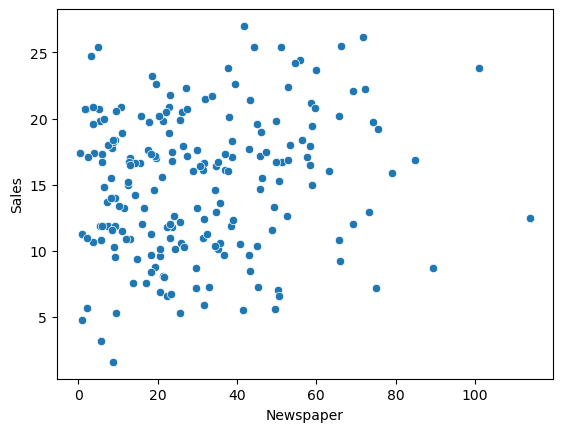

In [35]:
sns.scatterplot(x='Newspaper',y='Sales',data=sales)
plt.show()

see there is no linear relationship between newspaper asd sales, low spending on newspaper but the sales are distributed from low to high. 

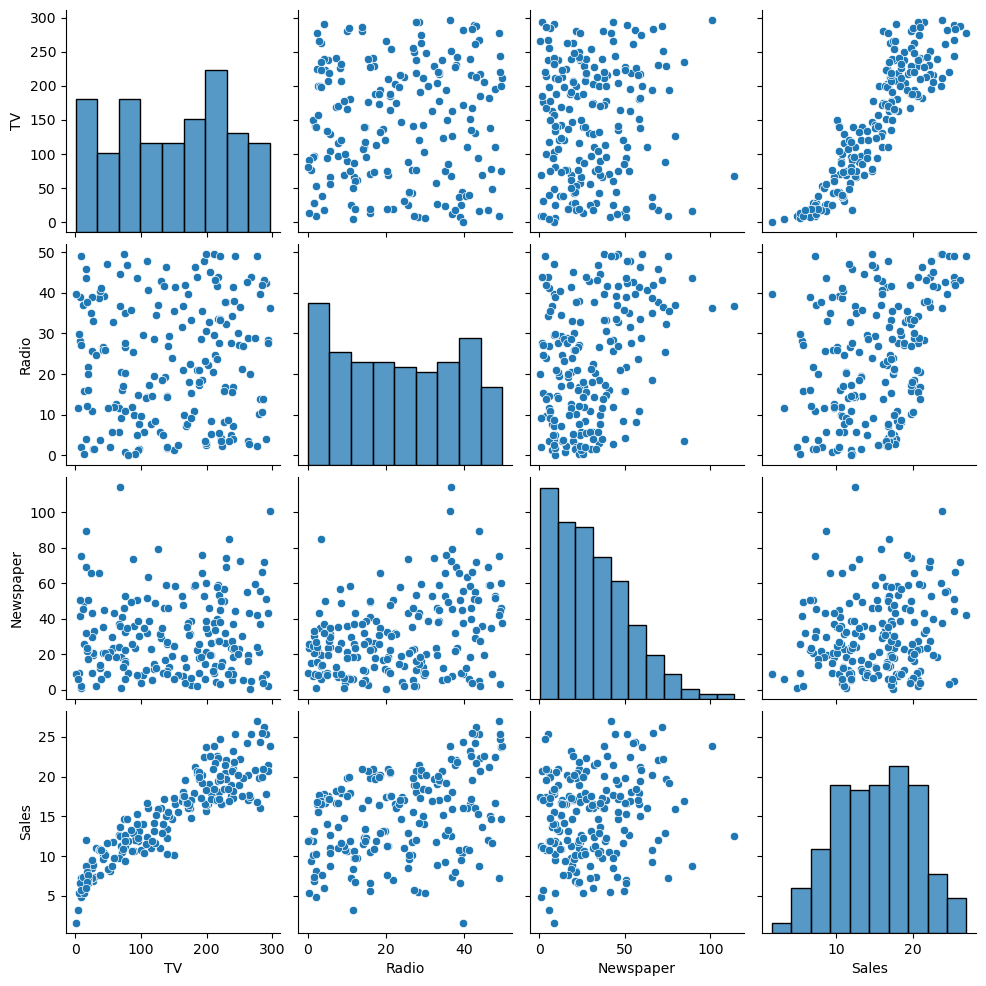

In [30]:
sns.pairplot(sales)

by this graph if i analyze sales bassed on these three platform i can say in TV with with more advertising the sales are increasing 
but in case of radio and newspaper it also depends on other factors.

### Input split

In [14]:
# Independent variables
X=sales.drop(['Sales'],axis=1)

In [15]:
# target variable
y=sales['Sales']

### Split the dataset

In [16]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Feature Scaling

In [17]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-1.26383466e+00,  1.08883282e+00,  7.02020503e-01],
       [ 6.41620605e-01, -1.01117555e+00, -1.76131259e-01],
       [ 1.50165676e+00, -8.95641110e-01, -4.10931195e-01],
       [-4.10838370e-01, -5.83018505e-01, -1.16229099e+00],
       [ 5.58315602e-01, -1.40535188e+00, -4.20323193e-01],
       [-1.73785186e+00, -7.93698956e-01, -1.14820300e+00],
       [ 1.34560654e+00,  1.39465928e+00, -1.18107499e+00],
       [-1.32250016e+00,  1.21116340e+00, -1.14350700e+00],
       [ 1.33035351e+00, -2.22822895e-01, -1.40178693e+00],
       [ 2.68508058e-01, -5.29193048e-02,  6.33646761e-02],
       [ 4.80877149e-01, -3.31561192e-01,  1.66939624e+00],
       [ 1.58848169e+00,  1.34029013e+00,  1.95585216e+00],
       [-8.44963031e-01, -1.58205161e+00, -9.83843040e-01],
       [ 3.56506300e-01,  1.55776673e+00,  1.34067633e+00],
       [ 8.23483638e-01, -1.28981744e+00,  9.22732443e-01],
       [ 1.15787696e+00,  8.98540798e-01,  1.97933216e+00],
       [ 4.17518415e-01, -1.48065315e-01

In [18]:
X_test=sc.transform(X_test)
X_test

array([[-0.90949508,  1.77524332,  0.7301965 ],
       [ 1.2106759 ,  0.24611101, -1.15759499],
       [-0.4612907 , -0.39952263,  0.39678059],
       [-0.4976633 ,  1.66650502,  0.99786842],
       [-1.41636495,  0.08979971, -1.31256295],
       [-1.55833545, -0.49466864, -0.36866721],
       [ 1.29632753,  0.37523774, -0.66921113],
       [ 0.71788575,  0.08979971, -0.80069909],
       [-0.13980378, -1.45292488, -0.99323504],
       [ 0.80119075,  0.67426806,  0.36390859],
       [-1.34009981,  1.15679425, -0.85705107],
       [ 0.27554792, -0.5354455 , -1.30317095],
       [ 0.82348364, -1.35098273, -0.80069909],
       [ 0.54775581,  1.77524332,  1.40172431],
       [ 0.4867437 ,  0.82378322,  2.13430011],
       [-1.26148804,  0.17135343, -0.44849918],
       [ 1.29867415, -1.34418659, -0.50015517],
       [-0.6631    , -1.4869056 , -1.06837102],
       [-1.19930262, -0.79369896, -0.55181116],
       [ 0.88918899,  0.98009452,  0.08684467],
       [-1.55598883, -0.21602675, -0.617

# Train the model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm=LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
print('Coefficients: ',lm.coef_)

Coefficients:  [ 4.68875319  1.6244972  -0.07693235]


In [23]:
y_pred=lm.predict(X_train)

In [24]:
# Importing MAE, rsq, MSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [25]:
# checking r2_score
r2 = r2_score(y_train,y_pred)
print(r2)

0.9037271946786809


In [26]:
predictions=lm.predict(X_test)

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.3753659261808713
MSE: 2.816214468002781
RMSE: 1.6781580581109699


<Axes: xlabel='Sales', ylabel='Density'>

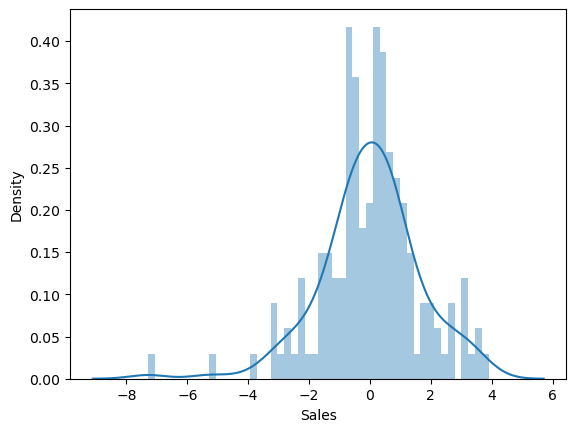

In [28]:
sns.distplot((y_train-y_pred),bins=50)

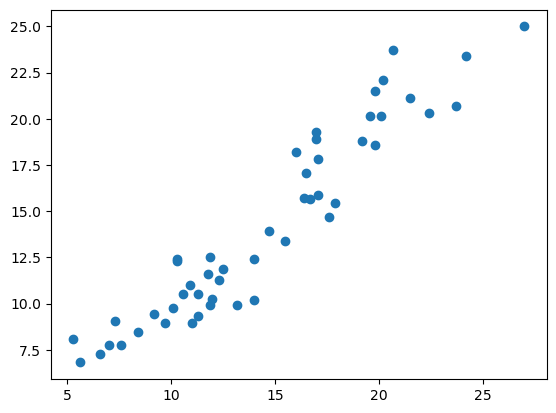

In [29]:
plt.scatter(y_test,predictions)